In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import TruncatedSVD
import math

Carga de Datos y Verficación de Data

In [2]:
# Cargar el archivo clases.txt
clases = pd.read_csv('clase.txt', delimiter=',')
# print(clases_mat)

# Cargar el archivo datasettissue.txt
data = pd.read_csv('dataset_tissue.txt', delimiter=',')
data = data.T
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,...,22205,22206,22207,22208,22209,22210,22211,22212,22213,22214
Unnamed: 0,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,90610_at,91580_at,91617_at,91682_at,91684_g_at,91703_at,91816_f_at,91826_at,91920_at,91952_at
GSM11805.CEL.gz,10.191267,6.040463,7.447409,12.025042,5.269269,8.535176,6.92169,5.71819,8.082076,5.434304,...,8.108419,5.251074,7.098663,8.210405,7.736744,6.434851,5.700448,9.211163,8.33913,7.367797
GSM11814.CEL.gz,10.509167,6.696075,7.775354,12.007817,5.180389,8.587241,6.96243,5.596042,7.568178,5.281319,...,8.072807,5.409345,6.905827,8.322514,8.192083,7.676989,6.566479,9.41598,8.214426,7.917754
GSM11823.CEL.gz,10.272027,6.144663,7.696235,11.633279,5.301714,8.277414,7.054633,5.576952,7.136474,5.282916,...,7.809687,5.297679,6.718544,8.404708,7.961902,6.424996,5.641277,8.192909,8.456095,7.598461
GSM11830.CEL.gz,10.252952,6.575153,8.478135,11.075286,5.372235,8.60365,7.115067,5.860551,8.605091,5.375391,...,8.036512,6.025769,6.716618,8.797825,8.325583,6.354779,5.754815,8.522238,8.558297,7.799779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM246493.CEL.gz,9.803686,6.058488,7.486711,9.914632,5.312712,7.421166,6.906639,5.778275,6.552426,5.435237,...,7.095949,5.362407,7.103406,7.972189,6.793989,6.216806,7.327094,8.452172,8.340901,7.658151
GSM246494.CEL.gz,10.509541,6.345526,7.468406,9.909784,5.341193,7.90008,6.982293,5.998825,6.779777,5.370535,...,7.056859,5.432815,7.047431,7.158617,7.924496,6.422848,10.260284,9.297665,8.258056,8.07374
GSM307639.CEL.gz,9.984502,6.715984,7.120793,9.409933,4.896124,8.119396,6.810089,5.965485,6.584802,5.420766,...,8.314995,5.65109,7.5469,7.872795,8.508173,7.154838,6.446923,8.753853,8.355681,7.907719
GSM307640.CEL.gz,9.937738,6.836179,7.125811,9.587782,5.296695,8.005432,6.976594,5.443173,6.64366,5.501452,...,7.860281,5.741697,7.509888,7.643282,8.384567,6.64589,7.64461,8.195537,8.589336,7.627872


In [3]:
#Escalamos la data para que todas la variables trabajen en la misma escala y la distancia que manejan los algoritmos no se confundan y den más peso a una variable que a otra.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# data_escaled = scaler.fit_transform(data.drop(['Unnamed: 0'], axis=0))
# print(data_escaled.shape)
data_escaled = data.drop(['Unnamed: 0'], axis=0)

Redimensión de la matriz Data: ¿PCA o SVD?

In [4]:
data_escaled = pd.DataFrame(data_escaled, columns = data.drop(['Unnamed: 0'], axis=0).columns)
data_escaled = data_escaled.to_numpy()

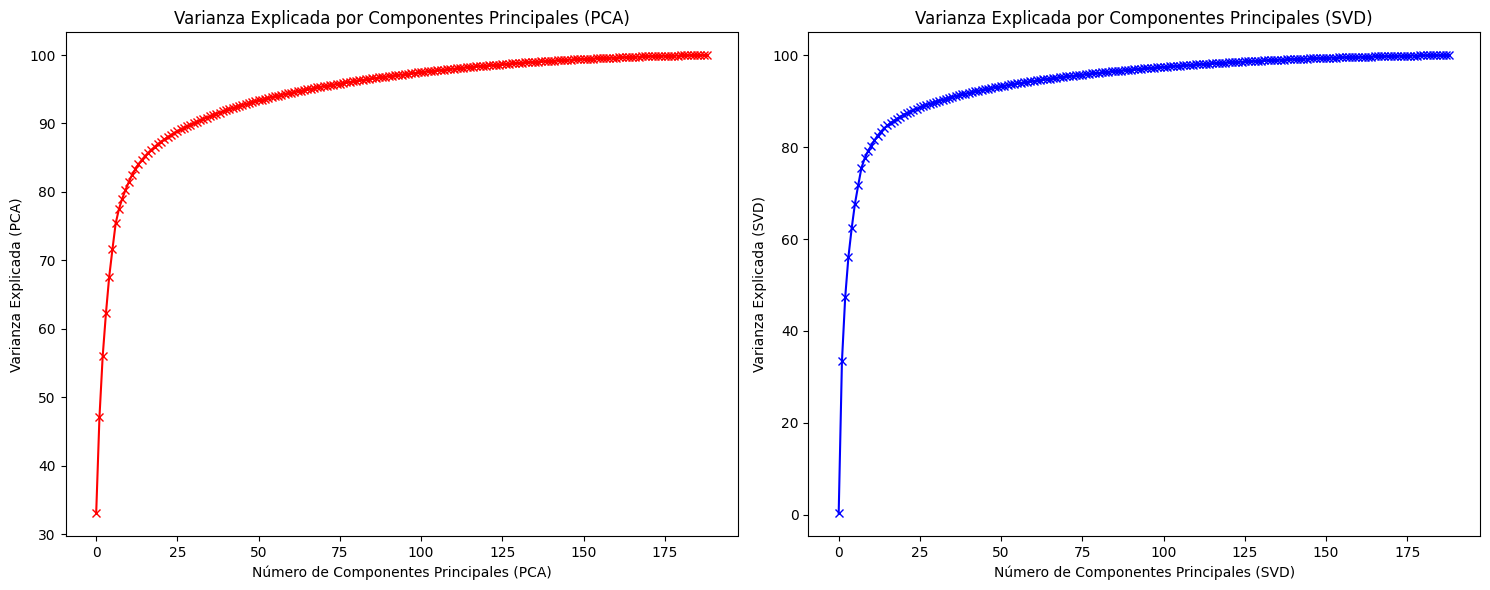

In [5]:
#PCA
pca = PCA()
pca.fit(data_escaled)
pca_data = pca.transform(data_escaled)
explained_variance_pca = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

# SVD con NumPy
svd = TruncatedSVD(n_components=data_escaled.shape[0])
svd.fit(data_escaled)
svd_data = svd.transform(data_escaled)
explained_variance_svd = np.cumsum(np.round(svd.explained_variance_ratio_, decimals=4) * 100)
# u, d, v = np.linalg.svd(data_escaled.astype(float), full_matrices=False)
# explained_variance_svd = np.cumsum((d ** 2) / np.sum(d ** 2) * 100)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(explained_variance_pca, 'r-x')
plt.xlabel('Número de Componentes Principales (PCA)')
plt.ylabel('Varianza Explicada (PCA)')
plt.title('Varianza Explicada por Componentes Principales (PCA)')

plt.subplot(1, 2, 2)
plt.plot(explained_variance_svd, 'b-x')
plt.xlabel('Número de Componentes Principales (SVD)')
plt.ylabel('Varianza Explicada (SVD)')
plt.title('Varianza Explicada por Componentes Principales (SVD)')

plt.tight_layout()
plt.show()


In [6]:
# num_components = 25
# svd_data = np.dot(u[:, :num_components], np.diag(d[:num_components]))
# print(u.shape, d.shape, v.shape)
# print(svd_data.shape)
print(svd_data.shape)
v1 = np.sum(pca.explained_variance_ratio_[:75]) * 100
v2 = np.sum(svd.explained_variance_ratio_[:75]) * 100
print("Varianza explicada por los primeros 25 componentes principales (PCA): ", v1)
print("Varianza explicada por los primeros 25 componentes principales (SVD): ", v2)

(189, 189)
Varianza explicada por los primeros 25 componentes principales (PCA):  95.7973753240125
Varianza explicada por los primeros 25 componentes principales (SVD):  95.7214278175197


In [7]:
# #Como vemos basta con 75 componentes para explicar el 95% de la varianza de los datos.
# svd = TruncatedSVD(n_components=75)
# svd.fit(data_escaled)
# svd_data = svd.transform(data_escaled)
# print(svd_data.shape)
pca_data = pd.DataFrame(pca_data[:,0:75])
pca_data = pca_data.values
print(pca_data.shape)
print(pca_data)

(189, 75)
[[-33.36763725 -27.601399    50.92606167 ...   1.78683464   4.29682718
    7.51218063]
 [-41.48310326 -36.99128399  36.45687416 ...  10.80248687  -6.33948859
   -6.2381131 ]
 [-41.32311415   3.8035407   36.12911397 ...   0.43578325   1.32311615
   -1.4282061 ]
 ...
 [-43.96330782 -36.2730025  -11.02132248 ...  -1.83320918   4.34145803
   -9.16721671]
 [-45.48406094 -24.41609103 -21.33784778 ...  -4.06052977   0.91697713
    0.42786796]
 [-51.8981521  -22.01633933 -27.14429492 ...   7.07668707  -4.45148824
   10.81261527]]


DBSCAN

In [46]:
def euclidean_distance(point1, point2):
    if len(point1) != len(point2):
        raise ValueError("Los puntos tienen dimensiones diferentes")
    return math.sqrt(sum([(a - b) ** 2 for a, b in zip(point1, point2)]))


def dbscan(data, epsilon, minPts):
    labels = [-1] * len(data) # Creo una listas de cluster que tiene como valores iniciales a 'None' (no asignadas)
    cluster_label = 0

    def range_query(data, dist, p, epsilon):
        # Encuentra los vecinos del punto p dentro de un radio epsilon
        neighbors = []
        for q in range(len(data)):
            if dist(data[p], data[q]) <= epsilon:
                neighbors.append(q)
        return neighbors

    def expand_cluster(p, neighbors, cluster_label):
        labels[p] = cluster_label
        i = -1
        while i < len(neighbors):
            q = neighbors[i]
            if labels[q] == -1:
                labels[q] = cluster_label
                q_neighbors = range_query(data, euclidean_distance, q, epsilon)
                if len(q_neighbors) >= minPts:
                    neighbors += q_neighbors
            i += 1

    for p in range(len(data)):
        if labels[p] != -1: #Salta los puntos ya procesados
            continue  

        neighbors = range_query(data, euclidean_distance, p, epsilon)

        if len(neighbors) < minPts:
            labels[p] = -1  # Los puntos no núcleo se consideran ruido
        else:
            expand_cluster(p, neighbors, cluster_label)
            cluster_label += 1
            

    return np.array(labels)

In [37]:
labels = [None] * len(pca_data)
labels = np.array(labels)
print(len(pca_data))

189


Hiperparámetros

In [8]:
from sklearn.neighbors import NearestNeighbors

In [9]:
neighbors = NearestNeighbors(n_neighbors=pca_data.shape[0]).fit(pca_data)
neighbors_fit = neighbors.fit(pca_data)
distances, indices = neighbors_fit.kneighbors(pca_data)

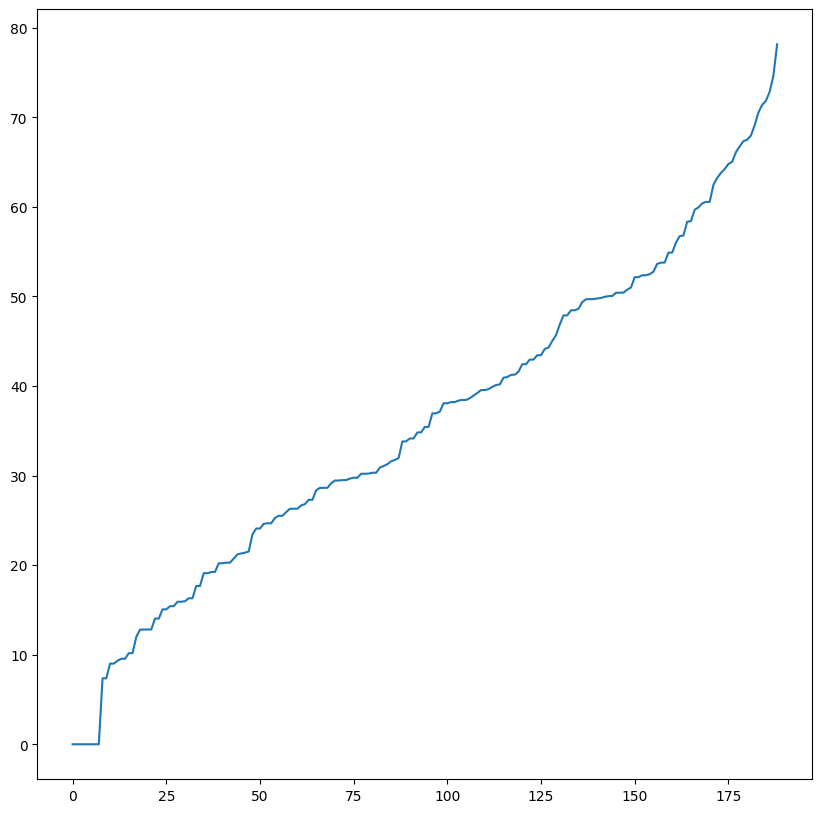

In [10]:
#Obtenemos todas las distancias de los puntos a sus vecinos más cercanos y las ordenamos de menor a mayor.
distances = np.sort(distances, axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(10, 10))
plt.plot(distances)

In [11]:
eps_values = np.arange(68,80,1)
min_samples = np.arange(2,10)

In [12]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples))
silhouette_scores = []

for params in dbscan_params:
    dbscan_cluster = DBSCAN(eps= params[0], min_samples= params[1])
    clusters = dbscan_cluster.fit_predict(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, clusters))

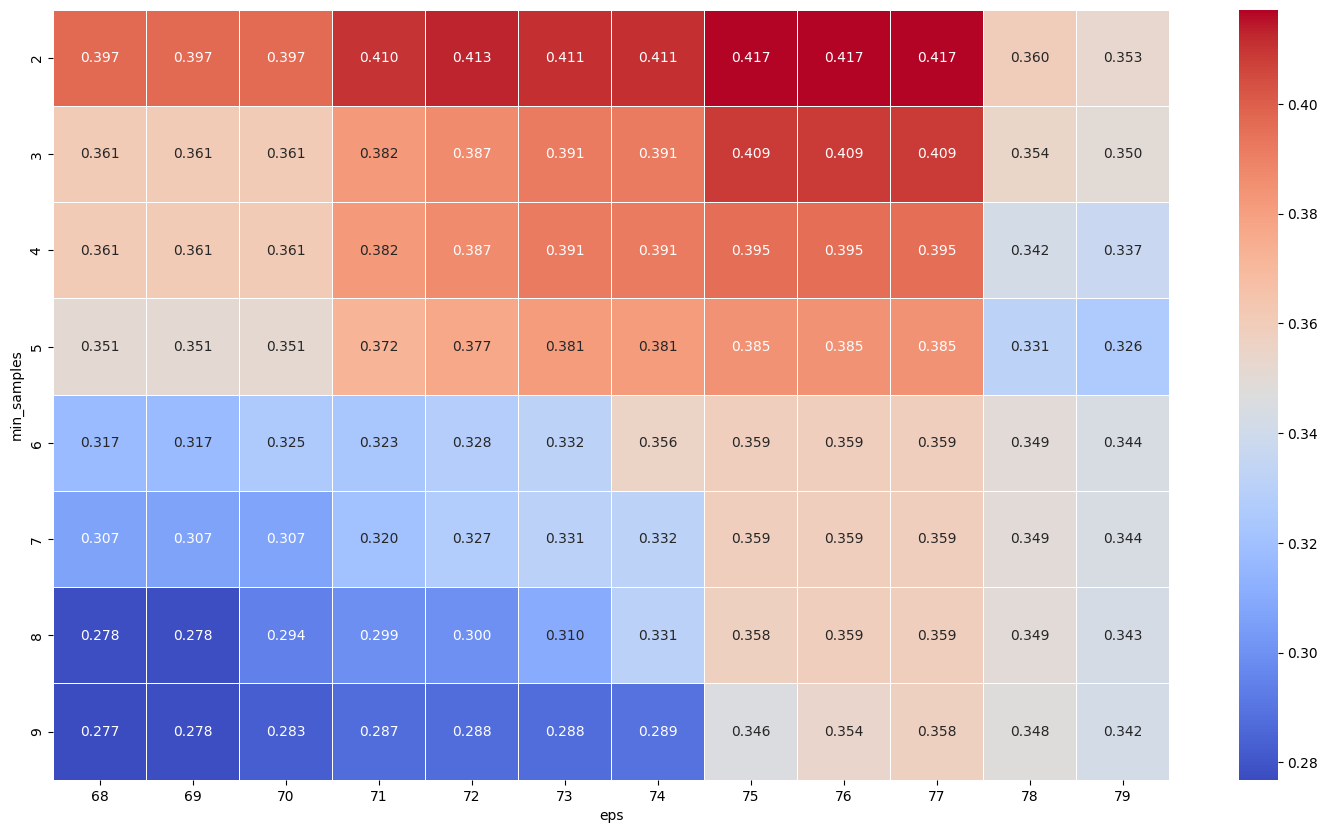

In [13]:
df_params_tunning = pd.DataFrame.from_records(dbscan_params, columns=['eps', 'min_samples']).assign(silhouette_score=silhouette_scores)
df_params_tunning['silhouette_score'] = silhouette_scores
pivot_data = pd.pivot_table(df_params_tunning, index='min_samples', columns='eps', values='silhouette_score')
fig,ax = plt.subplots(figsize=(18,10))
sns.heatmap(pivot_data, annot=True, annot_kws = {'size':10}, cmap='coolwarm', linewidths=.5, fmt='.3f', ax=ax)
plt.show()

Evaluación de DBSCAN

In [47]:
dbscan_cluster_imp = dbscan(pca_data, epsilon=75, minPts=2)
print(dbscan_cluster_imp.shape)
print(dbscan_cluster_imp)
print(silhouette_score(pca_data,dbscan_cluster_imp))

(189,)
[ 0  1  0  1  1  0 -1  0  1  0  1  0  1  0  1  0  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  0  1  1  0  1  1  1  1  0  1  1  1  1  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  0  0  0  5  5  5  0  0  0  5  5  5  0  0  3  2  5  5  5  5  5  5  6  6
  7  7  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  5  5  5  5  5
  5  5  5  5  5  5  5 10 10 10 10 10  3  3  3 11 11 11 11 11 11]
0.41714656612213047


In [27]:
#Notamos que los hiperparametros eps = 75,76 o 77 con n_sample=2, da el mayor coeficiente silhoutte.Son nuestro optimos.
dbscan_cluster = DBSCAN(eps= 75, min_samples= 2)
clusters = dbscan_cluster.fit_predict(pca_data)
print(clusters.shape)
print(clusters)
print(silhouette_score(pca_data,clusters))

(189,)
[ 0  1  0  1  1  0 -1  0  1  0  1  0  1  0  1  0  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  0  1  1  0  1  1  1  1  0  1  1  1  1  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  0  0  0  5  5  5  0  0  0  5  5  5  0  0  3  2  5  5  5  5  5  5  6  6
  7  7  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  5  5  5  5  5
  5  5  5  5  5  5  5 10 10 10 10 10  3  3  3 11 11 11 11 11 11]
0.41714656612213047


In [18]:
#Voy a tomar la primera fila de la data original
data_column = data.iloc[0]
data_complete = pd.DataFrame(data)
data_complete = data_complete[1:]
data.columns = data_column
data_complete['cluster'] = clusters

In [26]:
rows1 = data.drop(['Unnamed: 0'], axis=0).index
clases.index = rows1
clases

for i in np.unique(clusters):
    print("Cluster: ", i)
    indices = data_complete[data_complete['cluster'] == i].index.values
    print(clases['x'][indices])
    print("")

Cluster:  -1
GSM12079.CEL.gz    kidney
Name: x, dtype: object

Cluster:  0
GSM11805.CEL.gz     kidney
GSM11823.CEL.gz     kidney
GSM12075.CEL.gz     kidney
GSM12098.CEL.gz     kidney
GSM12268.CEL.gz     kidney
GSM12283.CEL.gz     kidney
GSM12300.CEL.gz     kidney
GSM12444.CEL.gz     kidney
GSM146778.CEL.gz    kidney
GSM146782.CEL.gz    kidney
GSM146789.CEL.gz    kidney
GSM35979.cel.gz     kidney
GSM35980.cel.gz     kidney
GSM35981.cel.gz     kidney
GSM35991.cel.gz     kidney
GSM35992.cel.gz     kidney
GSM35993.cel.gz     kidney
GSM36003.cel.gz     kidney
GSM44675.CEL.gz     kidney
Name: x, dtype: object

Cluster:  1
GSM11814.CEL.gz     kidney
GSM11830.CEL.gz     kidney
GSM12067.CEL.gz     kidney
GSM12105.CEL.gz     kidney
GSM12270.CEL.gz     kidney
GSM12298.CEL.gz     kidney
GSM12399.CEL.gz     kidney
GSM146779.CEL.gz    kidney
GSM146781.CEL.gz    kidney
GSM146783.CEL.gz    kidney
GSM146785.CEL.gz    kidney
GSM146787.CEL.gz    kidney
GSM146788.CEL.gz    kidney
GSM146791.CEL.gz    kidne

For n_clusters = 13 The average silhouette_score is : 0.41714656612213047


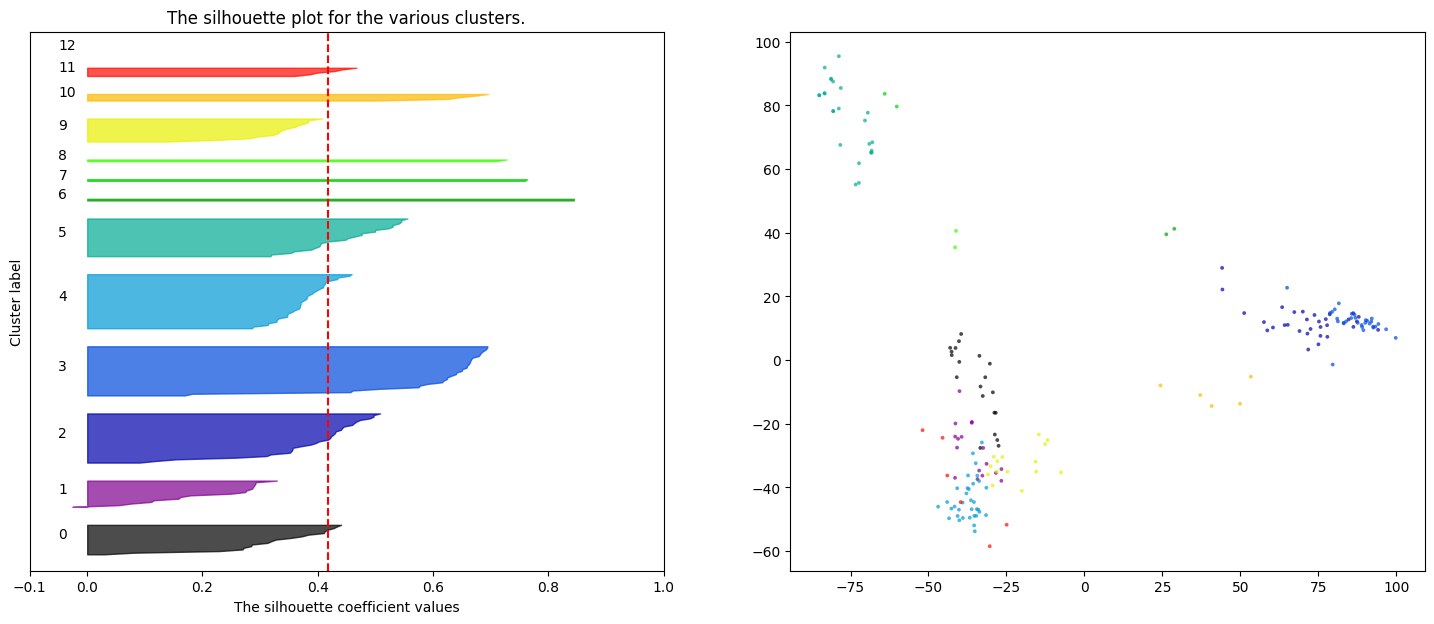

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])

clusterer = DBSCAN(eps= 75, min_samples= 2)
cluster_labels = clusterer.fit_predict(pca_data)
n_clusters = len(np.unique(cluster_labels))
ax1.set_ylim([0, len(pca_data) + (n_clusters + 1) * 10])


silhouette_avg = silhouette_score(pca_data, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

sample_silhouette_values = silhouette_samples(pca_data, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    pca_data[:, 0], pca_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

plt.show()